<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')



In [46]:
df = pd.read_csv('/content/Test.csv')

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [49]:
df.shape

(5681, 11)

In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [51]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f"Number of Numeric Columns: {len(numeric_cols)}")
print(f"Numeric Columns: {numeric_cols}\n")

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of Categorical Columns: {len(categorical_cols)}")
print(f"Categorical Columns: {categorical_cols}\n")


Number of Numeric Columns: 4
Numeric Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

Number of Categorical Columns: 7
Categorical Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']



In [52]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [53]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [54]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [55]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Unique Values in Item_Identifier:
['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']



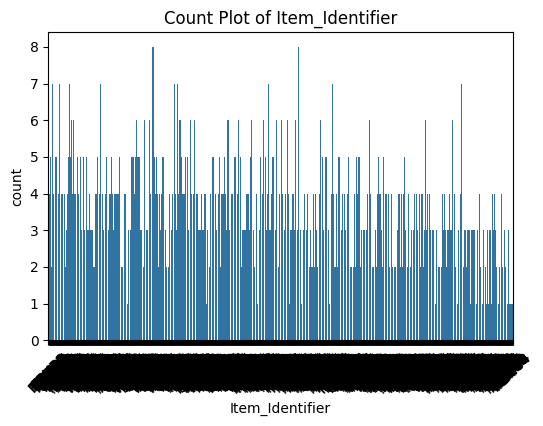

Unique Values in Item_Fat_Content:
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']



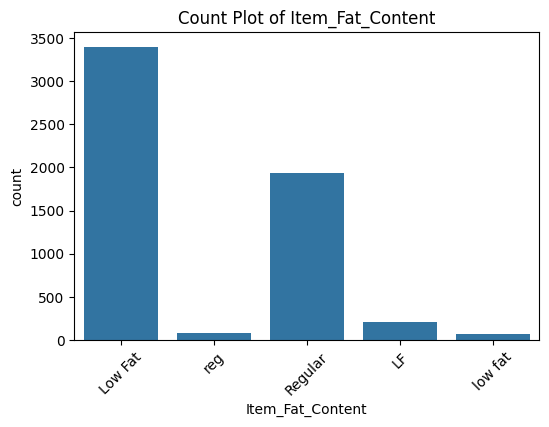

Unique Values in Item_Type:
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']



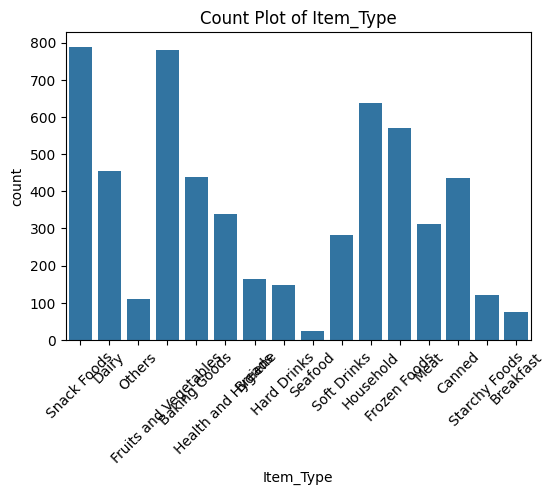

Unique Values in Outlet_Identifier:
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']



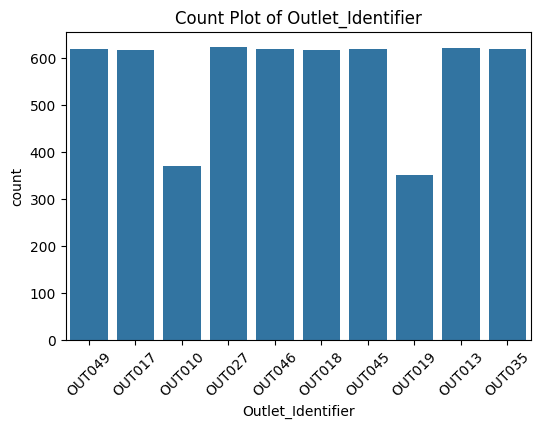

Unique Values in Outlet_Size:
['Medium' 'Small' 'High']



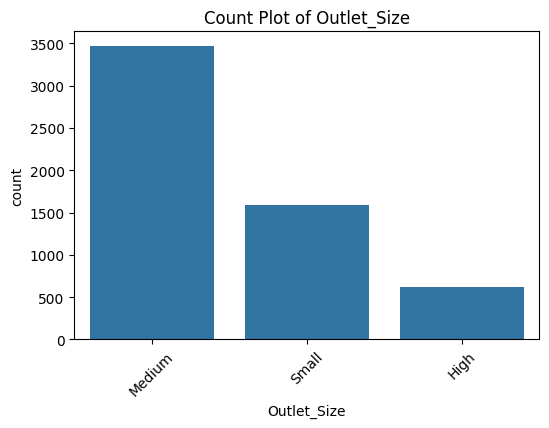

Unique Values in Outlet_Location_Type:
['Tier 1' 'Tier 2' 'Tier 3']



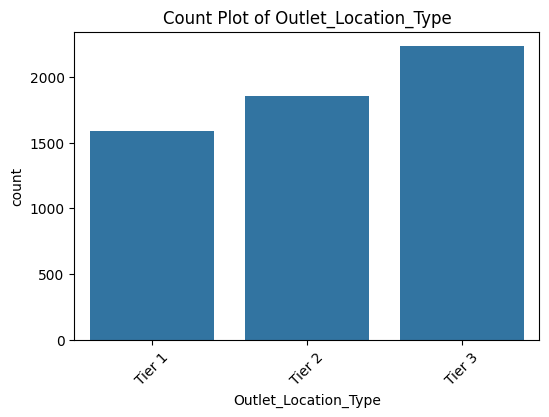

Unique Values in Outlet_Type:
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']



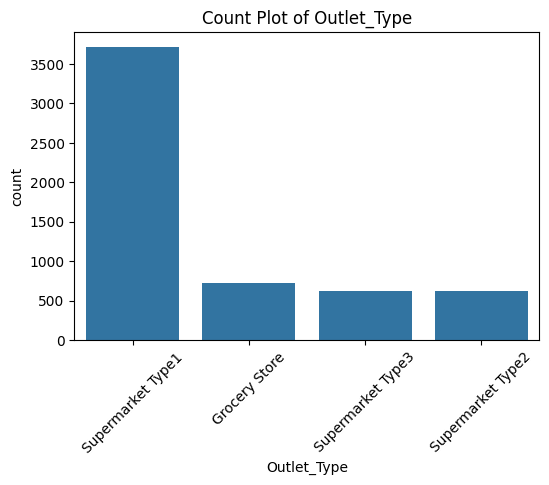

In [56]:
for col in categorical_cols:
    print(f"Unique Values in {col}:")
    print(df[col].unique())
    print()

    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

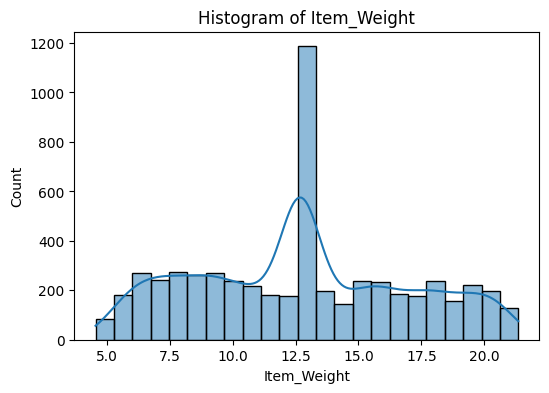

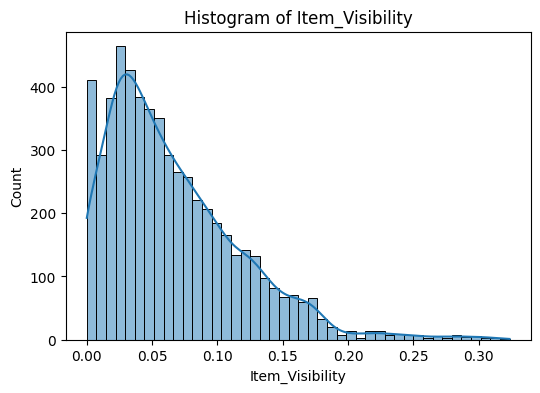

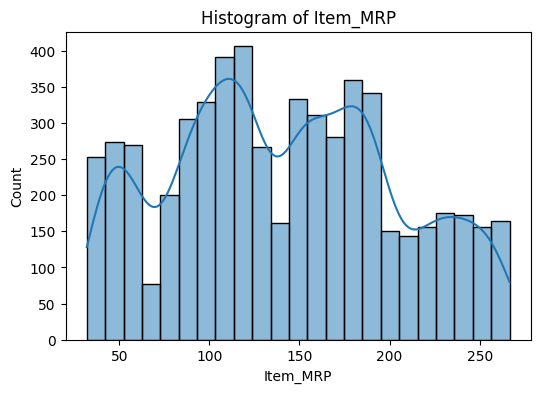

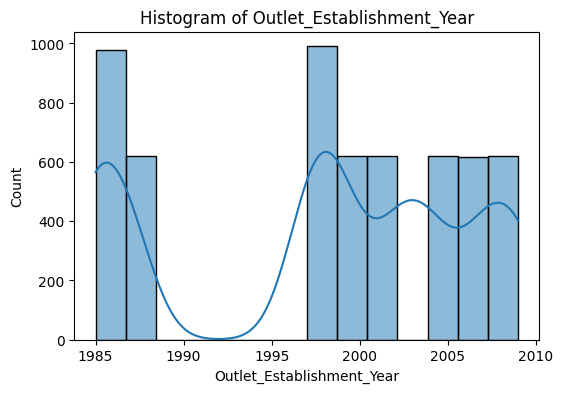

In [57]:
for col in numeric_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Histogram of {col}')
  plt.show()

In [58]:
df = df.drop('Item_Identifier', axis=1)

In [59]:
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']
df = df.drop('Outlet_Establishment_Year', axis=1)

In [60]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,26
1,8.300000,reg,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,18
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,27
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,18
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,40


In [61]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [62]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750000,1,0.007565,13,107.8622,9,1,0,1,26
1,8.300000,4,0.038428,4,87.3198,2,1,1,1,18
2,14.600000,1,0.099575,11,241.7538,0,1,2,0,27
3,7.315000,1,0.015388,13,155.0340,2,1,1,1,18
4,12.695633,2,0.118599,4,234.2300,5,1,2,3,40


In [63]:
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [64]:
numeric_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [65]:
# Calculate mean visibility per Item_Type
visibility_avg = df.groupby('Item_Type')['Item_Visibility'].mean()

# Map mean values to each row
df['Item_Visibility_MeanRatio'] = df['Item_Type'].map(visibility_avg)

# Create ratio column
df['Item_Visibility_MeanRatio'] = df['Item_Visibility'] / df['Item_Visibility_MeanRatio']


In [66]:
df['MRP_Bins'] = pd.cut(df['Item_MRP'],
                        bins=[0, 100, 200, 300, np.inf],
                        labels=['Low', 'Medium', 'High', 'Very High'])


In [67]:
df['Is_Outlet_Big'] = df['Outlet_Size'].apply(lambda x: 1 if x == 'High' else 0)


In [68]:
df[['Item_Visibility_MeanRatio', 'MRP_Bins', 'Is_Outlet_Big']].head()


,Item_Visibility_MeanRatio,MRP_Bins,Is_Outlet_Big
0,0.111374,Medium,0
1,0.547532,Low,0
2,1.910618,High,0
3,0.226557,Medium,0
4,1.689848,High,0


In [69]:
df['MRP_Bins'] = le.fit_transform(df['MRP_Bins'])

In [70]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_MeanRatio,MRP_Bins,Is_Outlet_Big
0,20.750000,1,0.007565,13,107.8622,9,1,0,1,26,0.111374,2,0
1,8.300000,4,0.038428,4,87.3198,2,1,1,1,18,0.547532,1,0
2,14.600000,1,0.099575,11,241.7538,0,1,2,0,27,1.910618,0,0
3,7.315000,1,0.015388,13,155.0340,2,1,1,1,18,0.226557,2,0
4,12.695633,2,0.118599,4,234.2300,5,1,2,3,40,1.689848,0,0
